In [1]:
#%pip install gym_super_mario_bros==7.3.0 nes_py

In [42]:
import gym_super_mario_bros 
import os
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
from nes_py.wrappers import JoypadSpace
from gym.wrappers import GrayScaleObservation
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack
from matplotlib import pyplot as plt

In [43]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).init_(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
        
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

In [8]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

In [9]:
obs = env.reset()

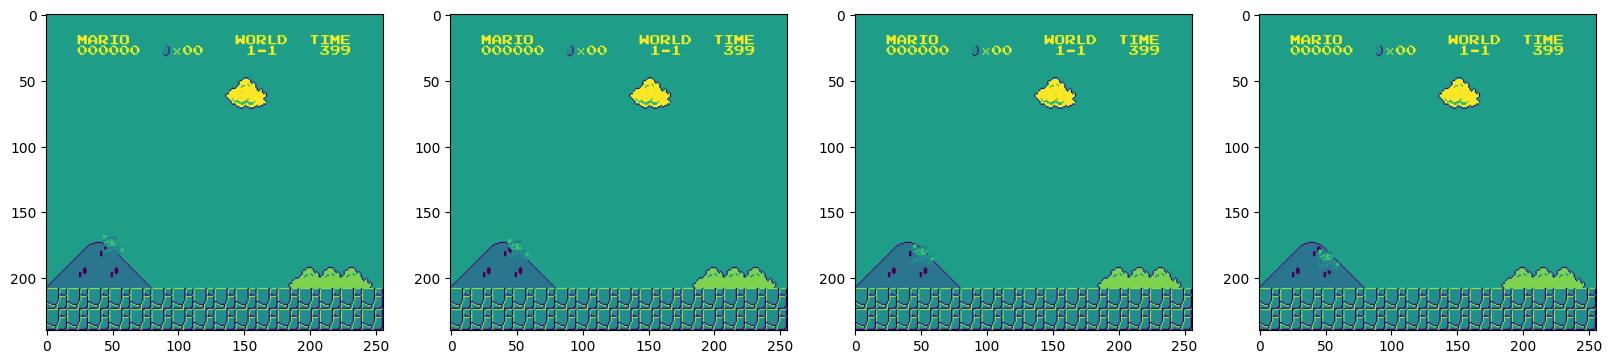

In [41]:
obs, reward, done, info = env.step([env.action_space.sample()])
plt.figure(figsize=(20,15))
for idx in range(obs.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(obs[0][:,:,idx])
plt.show()

In [4]:
done = True
for i in range(3000):
    if done:
        env.reset()
    obs, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

c:\Users\damem\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))
c:\Users\damem\AppData\Local\Programs\Python\Python311\Lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256
